In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import files
uploaded=files.upload()

Saving stock portfolio performance data set.xlsx to stock portfolio performance data set.xlsx


In [ ]:
data=pd.read_excel("stock portfolio performance data set.xlsx",header=1)

In [ ]:
data

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.019516,0.013399,1.902608,0.218617,0.60,0.40,0.488229,0.609445,0.780756,0.800000,0.68,0.333333
1,2,0.000,1.000,0.000,0.000,0.000,0.000,0.023829,0.006410,1.263287,0.128740,0.55,0.65,0.505279,0.508169,0.443776,0.414220,0.56,0.666667
2,3,0.000,0.000,1.000,0.000,0.000,0.000,0.080282,0.026548,1.894339,0.208272,0.55,0.50,0.728484,0.800000,0.776397,0.755594,0.56,0.466667
3,4,0.000,0.000,0.000,1.000,0.000,0.000,-0.006683,0.000728,1.425454,0.155526,0.55,0.35,0.384640,0.425836,0.529253,0.529196,0.56,0.266667
4,5,0.000,0.000,0.000,0.000,1.000,0.000,0.021999,0.004407,1.094579,0.106729,0.65,0.70,0.498046,0.479146,0.354852,0.319743,0.80,0.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200,0.034682,0.007396,1.010771,0.100845,0.55,0.65,0.548192,0.522462,0.310677,0.294491,0.56,0.666667
59,60,0.200,0.200,0.000,0.200,0.200,0.200,0.033733,0.006783,0.918444,0.092028,0.60,0.60,0.544438,0.513570,0.262013,0.256644,0.68,0.600000
60,61,0.200,0.000,0.200,0.200,0.200,0.200,0.044852,0.010413,1.162878,0.118172,0.55,0.50,0.588401,0.566175,0.390852,0.368861,0.56,0.466667
61,62,0.000,0.200,0.200,0.200,0.200,0.200,0.040456,0.008777,0.998392,0.100601,0.60,0.65,0.571021,0.542471,0.304153,0.293441,0.68,0.666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


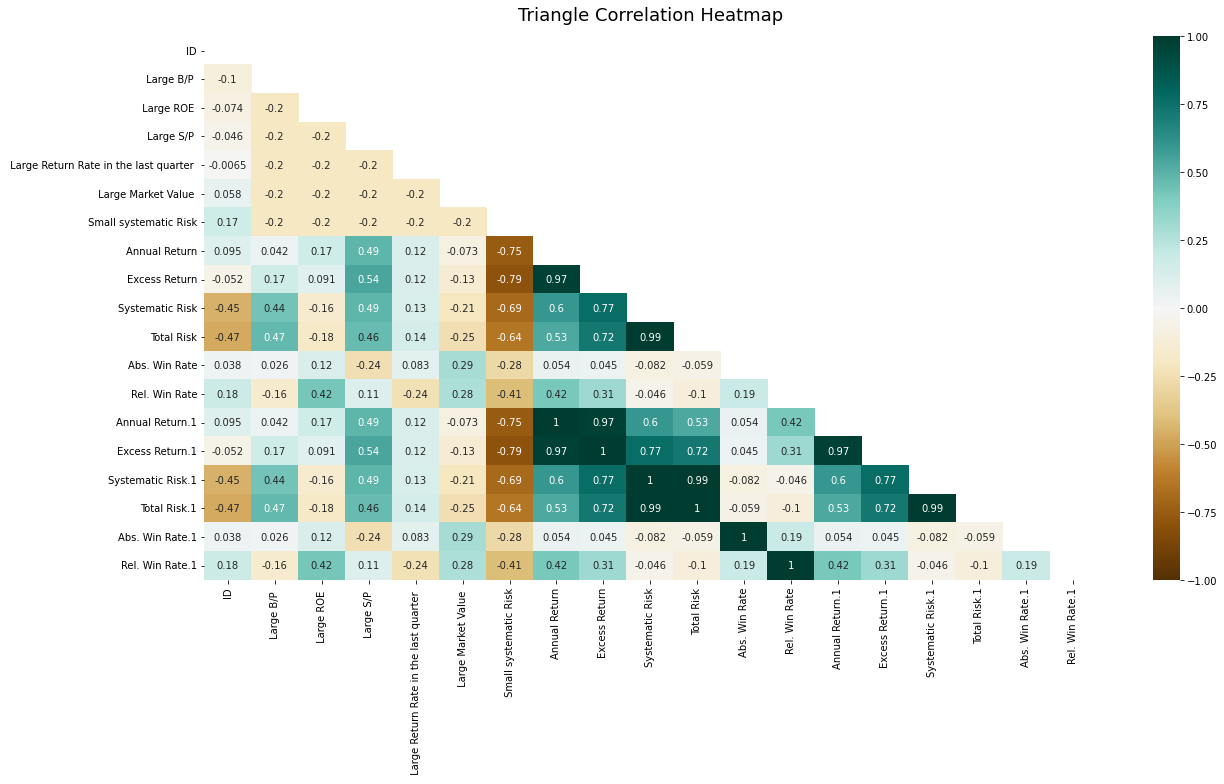

In [ ]:
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

Variable Dependiente, Annual return
Variable Independiente, Large S/P

In [ ]:
from scipy import optimize
import random

In [ ]:
def f( x, p0, p1):
    return p0+p1*x

def ff(x, p):
    return f(x, *p)

In [ ]:
def fit_leastsq(p0, datax, datay, function):

    errfunc = lambda p, x, y: function(x,p) - y

    pfit, pcov, infodict, errmsg, success = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p0)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p0))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

# These are the true parameters
p0,p1 = 1.0, 1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random()]
pfit, perr = fit_leastsq(pstart, data["Annual Return"], data["Excess Return"], ff)

print("\n# Fit parameters and parameter errors from lestsq method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from lestsq method :
pfit =  [-0.00081146  0.27257387]
perr =  [0.00043876 0.00891708]


Using optimize.curve_fit

In [ ]:
err_stdev = 0.2
def fit_curvefit(p0, datax, datay, function, yerr=err_stdev, **kwargs):
    """
    Note: As per the current documentation (Scipy V1.1.0), sigma (yerr) must be:
        None or M-length sequence or MxM array, optional
    Therefore, replace:
        err_stdev = 0.2
    With:
        err_stdev = [0.2 for item in xdata]
    Or similar, to create an M-length sequence for this example.
    """
    pfit, pcov = optimize.curve_fit(f,datax,datay,p0=p0, sigma=None, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = np.array(error)
    return pfit_curvefit, perr_curvefit 

pfit, perr = fit_curvefit(pstart, data["Annual Return"], data["Excess Return"], ff)

print("\n# Fit parameters and parameter errors from curve_fit method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from curve_fit method :
pfit =  [-0.00081146  0.27257387]
perr =  [0.00043876 0.00891708]


In [ ]:
def fit_bootstrap(p0, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: function(x,p) - y

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=0)


    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # 100 random data sets are generated and fitted
    ps = []
    for i in range(100):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta
        randomfit, randomcov = optimize.leastsq(errfunc, p0, args=(datax, randomdataY), full_output=0)
        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

pfit, perr = fit_bootstrap(pstart, data["Annual Return"], data["Excess Return"], ff)

print("\n# Fit parameters and parameter errors from bootstrap method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from bootstrap method :
pfit =  [-0.00082453  0.27259223]
perr =  [0.00042767 0.00871035]


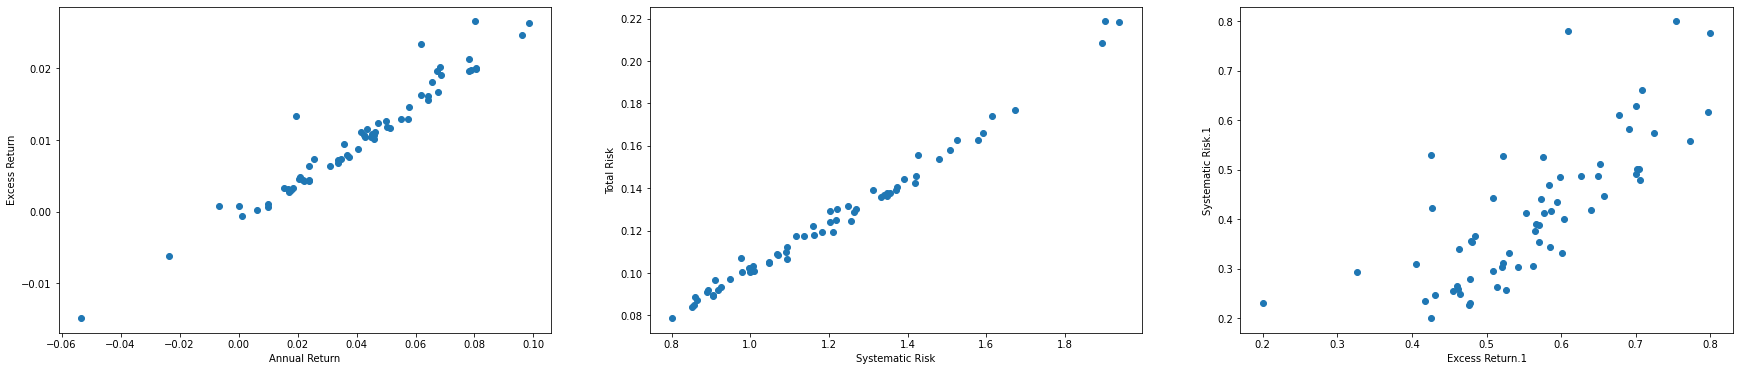

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(data["Annual Return"],data["Excess Return"])
plt.xlabel("Annual Return")
plt.ylabel("Excess Return")
plt.subplot(132)
plt.scatter(data["Systematic Risk"],data["Total Risk"])
plt.xlabel("Systematic Risk")
plt.ylabel("Total Risk")
plt.subplot(133)
plt.scatter(data["Excess Return.1"],data["Systematic Risk.1"])
plt.xlabel("Excess Return.1")
plt.ylabel("Systematic Risk.1")
plt.show()

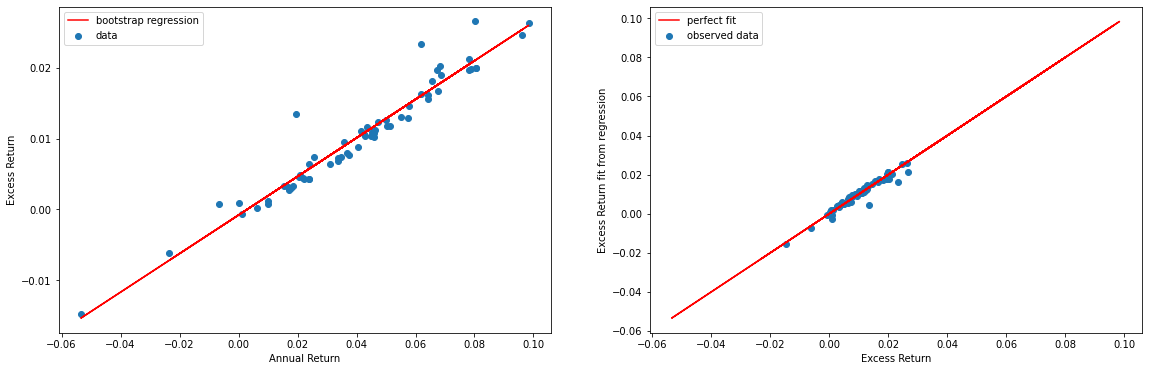

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(data["Annual Return"],data["Excess Return"],label="data")
x0=data["Annual Return"]#np.linspace(data["Annual Return"].min(),data["Annual Return"].max(),7)
plt.plot(x0,f(x0,*pfit),color="r",label="bootstrap regression")
plt.xlabel("Annual Return")
plt.ylabel("Excess Return")
plt.legend()
plt.subplot(132)
plt.scatter(data["Excess Return"],f(x0,*pfit),label="observed data")
plt.plot(x0,x0,color="r",label="perfect fit")
plt.xlabel("Excess Return")
plt.ylabel("Excess Return fit from regression")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(data["Excess Return"], f(x0,*pfit))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9387168643097132


In [ ]:
print('r2 score for perfect model is', r2_hand(data["Excess Return"], f(x0,*pfit)))

r2 score for perfect model is 0.9387168643097132


El coeficiente de correlación es del 93,871%